
# Ecuaciones implícitas


Vimos para el método de Euler implícito que teníamos que resolver una ecuación del tipo:
$$
\begin{equation}
y_{j+1} = y_j + h  f(y_{j+1}, x_{j+1}).
\end{equation}
$$
para obtener $y_{j+1}$ a partir de $y_j$ y $x_{j+1}$ conocidos.

Este problema se puede llevar al problema de encontrar los valores de $y$ tales que la función:
$$
 F(y)= y_j - y + h  f(y, x_{j+1}).
$$
se anule: $F(y)=0$.

Hay una variedad de métodos que se pueden usar para resolver este problema. Uno de los más famosos es el de Newton-Raphson que es en general muy rápido si se conoce la derivada de la función $F(y)$


## Método de Newton-Raphson


El método de Newton-Raphson es un algoritmo iterativo utilizado para encontrar aproximaciones de las raíces de una función $f(x)$ (valores de $x$ tales que $f(x)=0$). La idea principal del método es utilizar la recta tangente a la función en un punto dado $x_n$ para encontrar el siguiente $x_{n+1}$. En el punto $x_{n+1}$ cruza el cero la recta tangente a $f(x)$ en el punto $x_n$. La ecuación de la recta tangente es:
$$f_{tan}^{n}(x) = f(x_n) + (x-x_n) f'(x_n)$$
y se anula para:
$$
x = x_n - \frac{f(x_n)}{f'(x_n)}
$$

El método se reduce a comenzar con una aproximación inicial $x_0$ de la raíz, para  luego, iterar actualizando la aproximación utilizando la siguiente fórmula:
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

El proceso se repite hasta que se alcanza un criterio de convergencia, como un número máximo de iteraciones o un umbral de tolerancia para la diferencia entre aproximaciones sucesivas.

Este método puede no converger, dependiendo del tipo de función y del punto inicial $x_0$.

En el código de la celda de abajo se usa el método de Newton para obtener la raíz de la función $f(x) =x^3-x+2$.

* ¿Qué tan rápido converge a la solución?
* ¿Para qué condiciones iniciales ($x_0$) espera que este método tenga problemas en el caso $f(x) =x^3-x+2$?
* ¿Cómo se podrá usar el método para encontrar una aproximación a $\sqrt{2}$?
* ¿Se podrá generalizar a más de una dimensión espacial o a funciones de variable compleja?



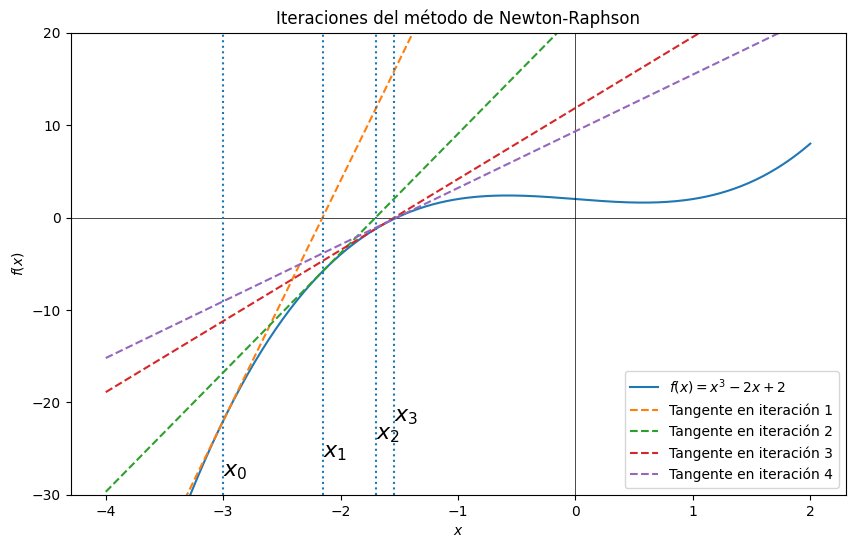

In [2]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x + 2

def df(x):
    return 3*x**2 -1

def tangent_line(x, x_n):
    return df(x_n) * (x - x_n) + f(x_n)

def newton_raphson(x0, num_iter):
    x_n = x0
    for _ in range(num_iter):
        x_n = x_n - f(x_n) / df(x_n)
    return x_n

def plot_newton_raphson(x0, num_iter):
    x = np.linspace(-4, 2, 400)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.ylim([-30,20])
    plt.plot(x, y, label='$f(x) = x^3 - 2x + 2$')
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)

    x_n = x0
    for i in range(num_iter):
        plt.plot(x, tangent_line(x, x_n), linestyle='--', label=f'Tangente en iteración {i+1}')
        poslabel = "$x_{it}$".format(it=i)
        plt.text(x_n, -28+2*i, poslabel, fontsize=16)
        plt.axvline(x=x_n,linestyle='dotted')
        x_n = newton_raphson(x_n, 1)


    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('Iteraciones del método de Newton-Raphson')
    plt.show()

x0 = -3
num_iter = 4
plot_newton_raphson(x0, num_iter)


## Ejemplos

### Campo medio para el modelo de Ising
El modelo de Ising en una dimensión con interacciones de primeros vecinos en la aproximación de campo medio se puede resolver mediante la ecuación trascendental:

$$
m = \tanh\left(\frac{zJm + h}{k_BT}\right)
$$

donde $m$ es la magnetización por espín, $z$ el número de primeros vecinos, $J$ es la constante de acoplamiento, $h$ es el campo magnético externo, $k_B$ es la constante de Boltzmann y $T$ es la temperatura.

Podemos utilizar el método de Newton-Raphson para encontrar la solución de esta ecuación trascendental. Buscamos los valores de $m$ tales que se anule la función:

$$
f(m) = m - \tanh\left(\frac{zJm + h}{k_BT}\right)
$$

y su derivada es:

$$
f'(m) = 1 - \mathrm{sech}^2\left(\frac{zJm + h}{k_BT}\right) \cdot \frac{J}{k_BT}
$$

El código utiliza el método de Newton-Raphson para resolver la ecuación trascendental del modelo de Ising en la aproximación de campo medio.
* Para $h=0$ se puede ver que $m=0$ es siempre una solución de la ecuación y que si $m^*$ es solución para una temperatura dada entonces $-m^*$ también lo es. ¿Qué sentido tiene la solución $m=0$?
* La magnetización (para $h=0$) se comporta de la forma $m\propto (T_c-T)^\beta$ para $T\lesssim T_c$, donde $T_c$ es la temperatura crítica por debajo de la cual aparecen soluciones con $m\neq 0$ y $\beta$ es un exponente crítico. ¿Cómo se podría obtener $\beta$ numéricamente?  
* Investigar un poco qué tan buena es la solución de campo medio. En particular qué pasa en una dimensión espacial.
* Más adelante en la materia vamos a hacer simulaciones del modelo de Ising.



/var/folders/18/8wj5kxln1dzbpqvfs_35mz000000gn/T/ipykernel_4754/3266835188.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


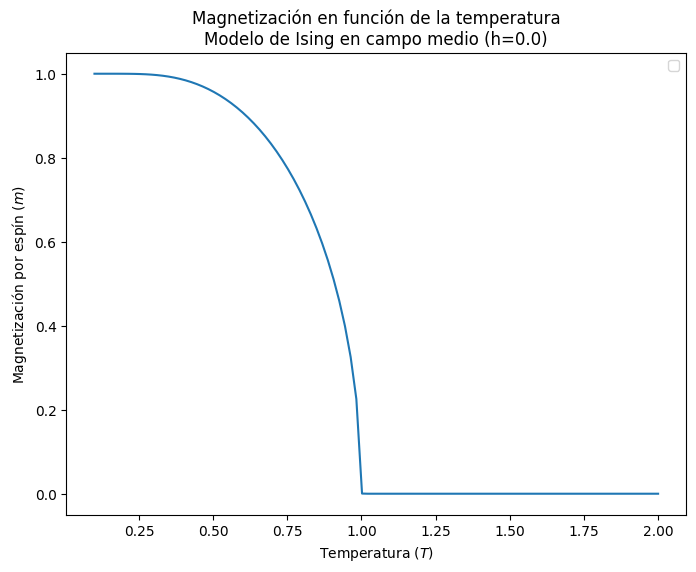

In [3]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def ising_equation(m, J, h, k_B, T):
    return m - np.tanh((J * m + h) / (k_B * T))

def ising_equation_derivative(m, J, h, k_B, T):
    return 1 - (1 / np.cosh((J * m + h) / (k_B * T)))**2 * (J / (k_B * T))

def newton_raphson(m0, J, h, k_B, T, tol=1e-6):
    m = m0
    while abs(ising_equation(m, J, h, k_B, T)) > tol:
        m = m - ising_equation(m, J, h, k_B, T) / ising_equation_derivative(m, J, h, k_B, T)
    return m

def plot_magnetization_vs_temperature(J, h, k_B, T_min, T_max, num_points=100):
    T_values = np.linspace(T_min, T_max, num_points)
    m_values = [newton_raphson(0.5, J, h, k_B, T) for T in T_values]

    plt.figure(figsize=(8, 6))
    plt.plot(T_values, m_values)
    plt.xlabel('Temperatura ($T$)')
    plt.ylabel('Magnetización por espín ($m$)')
    plt.title('Magnetización en función de la temperatura\nModelo de Ising en campo medio (h='+str(h)+")")
    plt.legend()
    plt.show()

# Parámetros del modelo de Ising en campo medio
z = 4
J = 0.25
h = 0.0
k_B = 1.0
T_min = 0.1
T_max = 2.0

plot_magnetization_vs_temperature(J*z, h, k_B, T_min, T_max)



### Conjunto de Julia


El método de Newton-Raphson también se puede aplicar a funciones de números complejos. En ese caso, la función $f(z)$ y su derivada $f'(z)$ son funciones de una variable compleja, y la fórmula de actualización se aplica de la misma manera:

$$
z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n)}
$$

Cabe destacar que el método de Newton-Raphson no garantiza la convergencia para todas las funciones y aproximaciones iniciales. La convergencia depende de la naturaleza de la función y la elección del punto inicial. En algunos casos, el método puede converger a una raíz diferente de la esperada o no converger en absoluto. Esto se ilustra de una manera bastante llamativa con el conjunto de Julia.

El programa provisto grafica (**a la izquierda**) el número de iteraciones para converger a una de las raíces de $f(z)=z^3-1$ (con cierta tolerancia) y (**a la derecha**) la raíz de convergencia con un color distinto para cada una de ellas. La parte real e imaginaria de los gráficos se refiere al punto de partida $z_0$ para el método de Newton-Raphson.

* Hay puntos de partida para los cuales la convergencia se hace más lenta. Las regiones de partida en el plano complejo que convergen a una raíz no forman un conjunto conexo. ¡Forman un fractal!
* Otras funciones dan lugar a diferentes conjuntos de Julia.
* Se puede hacer un zoom para ver la autosimilaridad del conjunto de Julia.

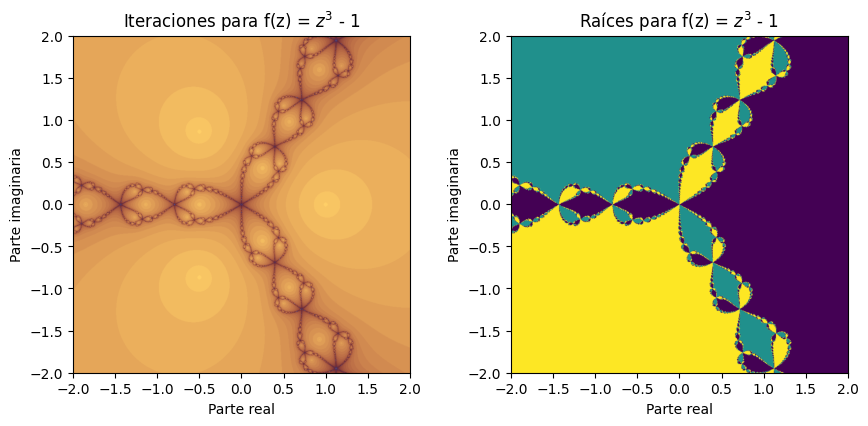

In [5]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# función de variable compleja
def f(z):
    return z**3 - 1

# derivada de la función de variable compleja
def df(z):
    return 3 * z**2

# Método de Newton-Raphson
def newton_raphsonJ(z, max_iter=50, tol=1e-6):
    # Raíces cúbicas de 1
    roots = [complex(1, 0), complex(-0.5, np.sqrt(3)/2), complex(-0.5, -np.sqrt(3)/2)]
    # Fija un número máximo de iteraciones
    for i in range(max_iter):
        if abs(f(z)) < tol:
            # Se fija a cuál raíz convirgió
            distances = [abs(z - root) for root in roots]
            idx = np.argmin(distances)
            return i, idx # devuelve el número de iteraciones y la raíz
        z = z - f(z) / df(z)
    return max_iter, -1

def plot_julia_set(ax, width, height, xlim, ylim, plot_type='iterations', max_iter=50, tol=1e-6, cmap='inferno'):
    julia_set_iterations = np.empty((width, height))
    julia_set_roots = np.empty((width, height))

    for x in range(width):
        for y in range(height):
            zx = x * (xlim[1] - xlim[0]) / (width - 1) + xlim[0]
            zy = y * (ylim[1] - ylim[0]) / (height - 1) + ylim[0]
            z = complex(zx, zy)
            julia_set_iterations[x, y], julia_set_roots[x, y] = newton_raphsonJ(z, max_iter, tol)

    if plot_type == 'iterations':
        img = ax.imshow(julia_set_iterations.T, extent=[*xlim, *ylim], cmap=cmap, origin='lower')
        #plt.colorbar(img, ax=ax, label='Número de iteraciones')
        ax.set_title('Iteraciones para f(z) = $z^3$ - 1')
    elif plot_type == 'roots':
        img = ax.imshow(julia_set_roots.T, extent=[*xlim, *ylim], cmap=cmap, origin='lower', vmin=0, vmax=2)
        #plt.colorbar(img, ax=ax, label='Raíz')
        ax.set_title('Raíces para f(z) = $z^3$ - 1')

    ax.set_xlabel('Parte real')
    ax.set_ylabel('Parte imaginaria')

# Dos subplots en la figura
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Grafica un mapa de color con el número de iteraciones
plot_julia_set(ax[0], 800, 800, (-2, 2), (-2, 2), plot_type='iterations', max_iter=50, tol=1e-6, cmap='managua')

# Le pone un color distinto a cada condición inicial según la raíz a la que converge
plot_julia_set(ax[1], 800, 800, (-2, 2), (-2, 2), plot_type='roots', max_iter=50, tol=1e-6, cmap='viridis')

# Espacio entre gráficas
fig.subplots_adjust(wspace=0.3)

# Muestra las figuras
plt.show()



### Mapeo logístico


Si buscamos los ceros de la función
$$f(x) = c_{0} e^{\frac{\log(r (1 - x) - 1) - \log(x)}{r - 1}}$$
para $r>1$ y $0<x<1$. ¿Tiene alguno?

Si usamos el método de N-R llegamos a
$$
x_{n+1}= r x_n(1-x_n).
$$



/var/folders/18/8wj5kxln1dzbpqvfs_35mz000000gn/T/ipykernel_4754/466190110.py:2: RuntimeWarning: invalid value encountered in log
  a = np.log(r*(1-x) - 1)


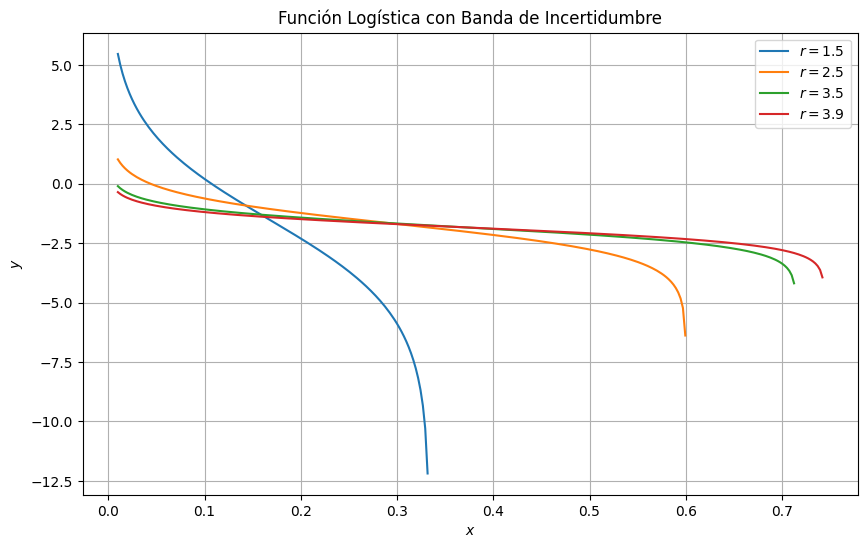

In [8]:
def genera_logistica(r, c0, x):
    a = np.log(r*(1-x) - 1)
    b = np.log(x)

    return c0 * np.exp((a - b)/(r-1))

# Ploteo de la función logística
r_values = [1.5, 2.5, 3.5, 3.9]
c0 = 0.1
x = np.linspace(0.01, 0.99, 400)    
d = 0.01

plt.figure(figsize=(10, 6))
for r in r_values:
    c = np.log(genera_logistica(r, c0, x))
    plt.plot(x, c, label=f'$r={r}$')
    plt.fill_between(x, c - d, c + d, alpha=0.2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Función Logística con Banda de Incertidumbre')
plt.legend()
plt.grid()
plt.show()

In [ ]:


def logistica(r, x):
    return r * x * (1 - x)

def graficar_logistica(r, x0, n):
    x = x0
    xs = [x0]
    for i in range(n):
        x = logistica(r, x)
        xs.append(x)
    plt.plot(xs)
    plt.title(f"Logística: r={r}, x0={x0}")
    plt.xlabel("Iteración")
    plt.ylabel("x")
    plt.grid()
    plt.show()